<h1 style="font-size: 50px; color: #0059b3; text-align: center;"> DRINKING WATER POTABILITY </h1>

<style>
  .center-image {
    text-align: center;
  }
</style>

<p class="center-image">
<img src="www.jpg" width="1000" height="800" alt="Your image description">
</p>

#### In this classification type of problem we will try to predict the potability.The dataset contains water quality metrics for 3276 different water bodies.Here I have used RandomForestClassifier  by cross validation. 

### <center> ATTRIBUTE DESCRIPTION 

# 
1.PH value PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
2. Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
3. Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
4. Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
6. Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
9. Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## <center> IMPORTING NECESSARY PACKAGES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('drinking_water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.shape

(3276, 10)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

0

### <center> PERFORMING SOME EDA

#### <center> UNIVARIATE ANALYSIS

#### Histplot

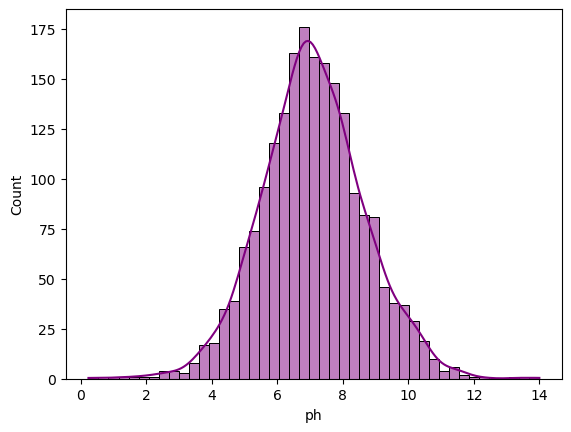

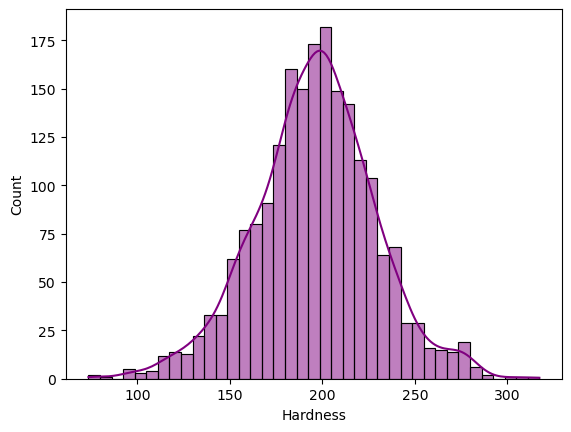

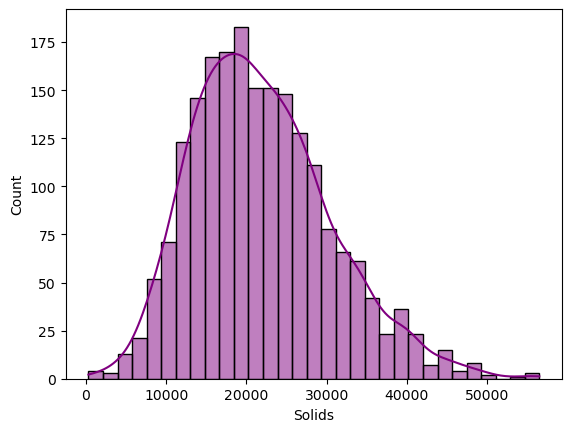

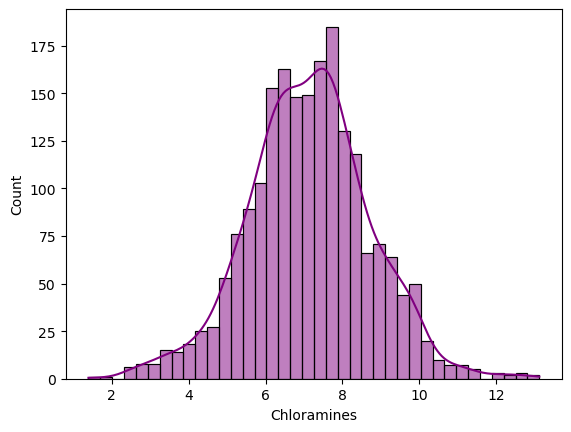

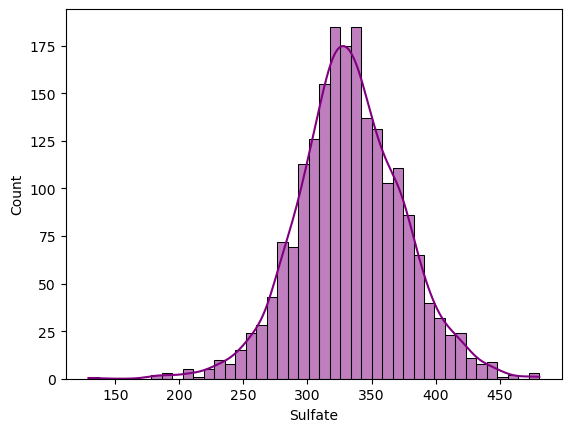

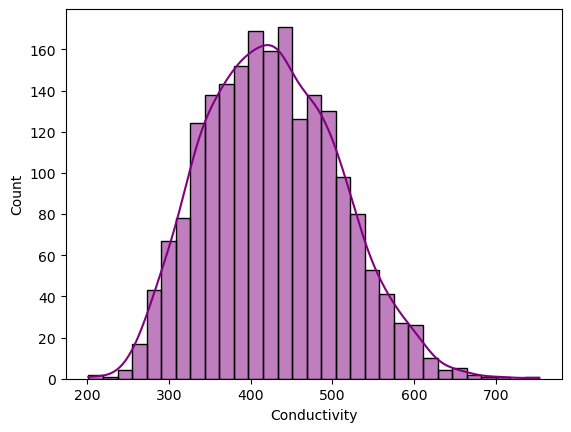

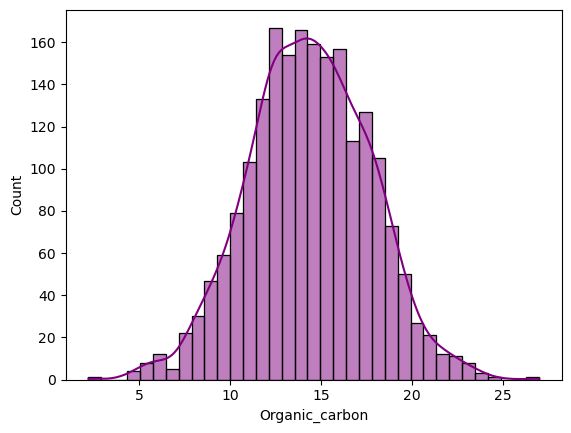

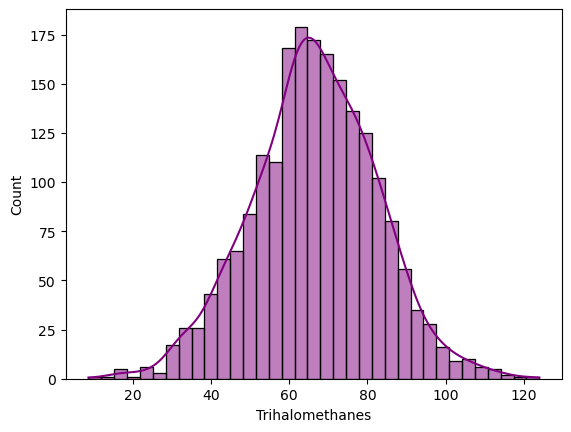

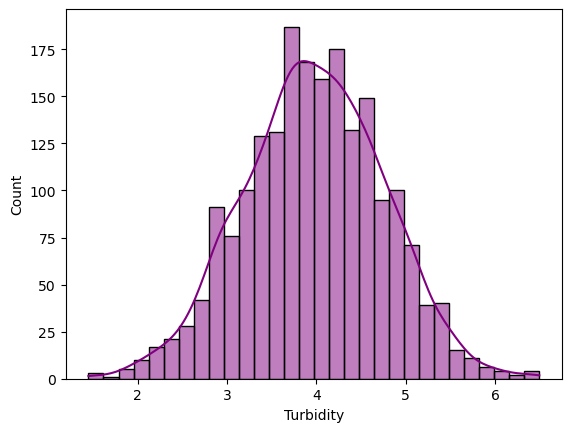

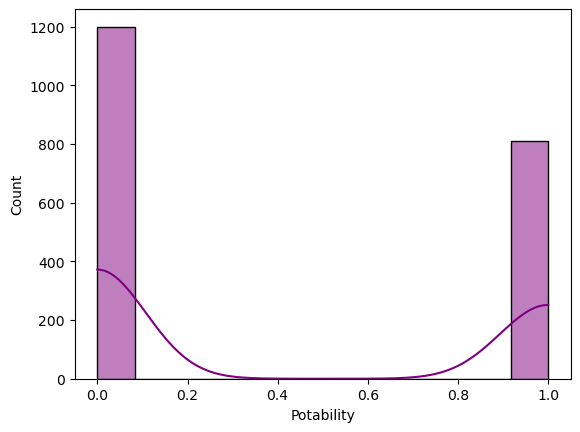

In [9]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i],kde=True,color='purple')
        plt.show()

#### Boxplot

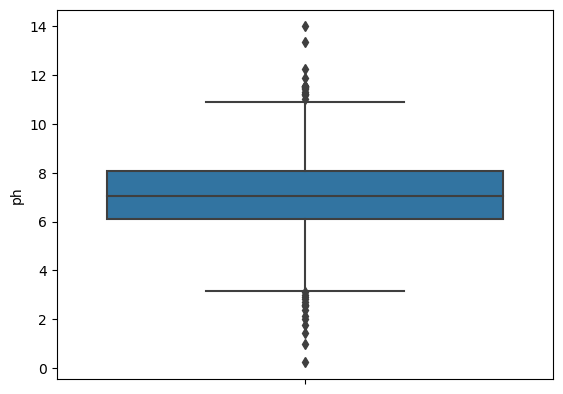

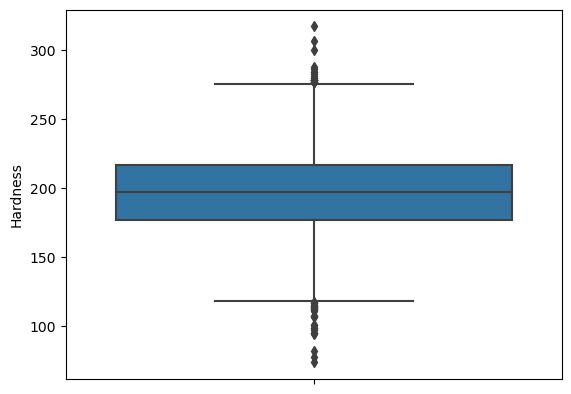

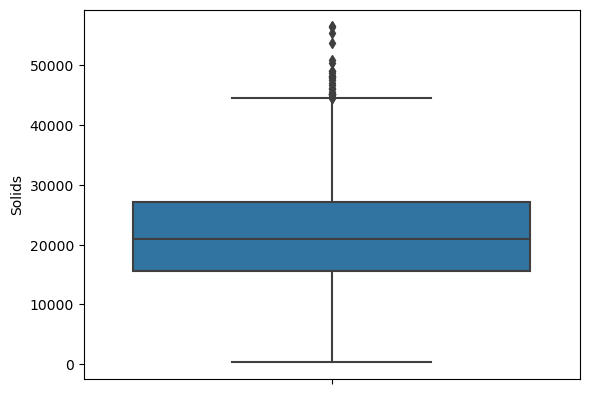

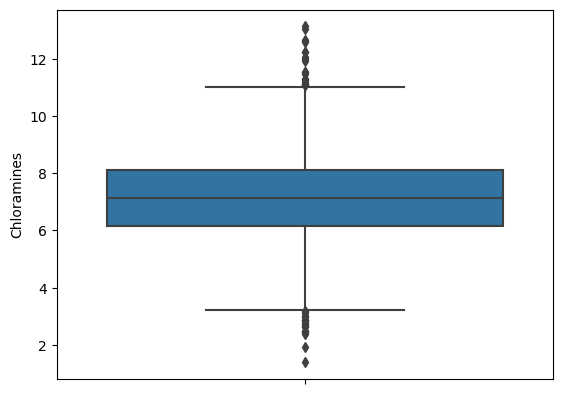

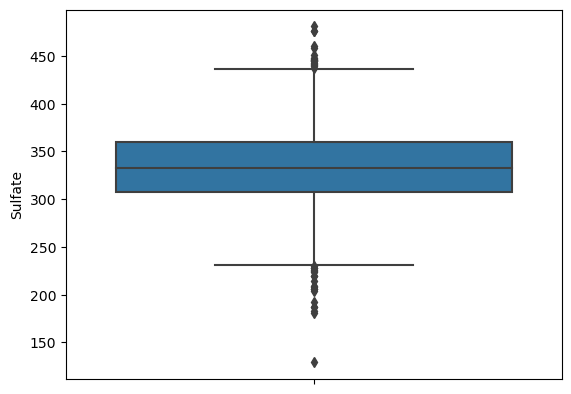

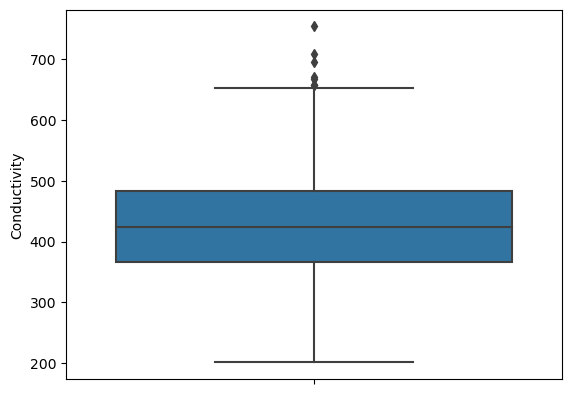

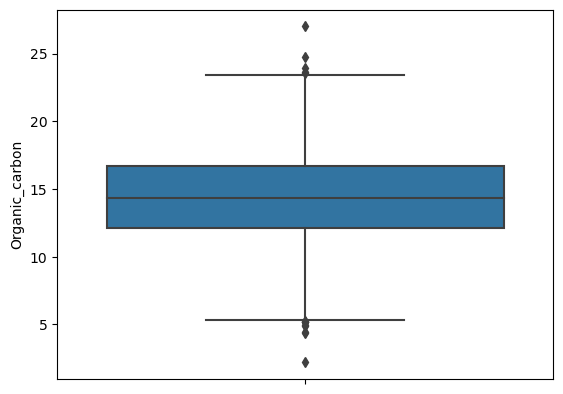

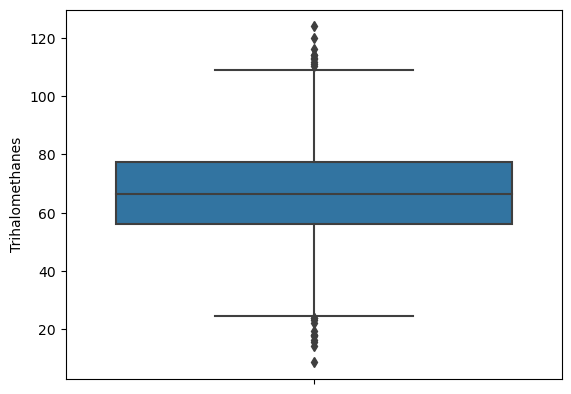

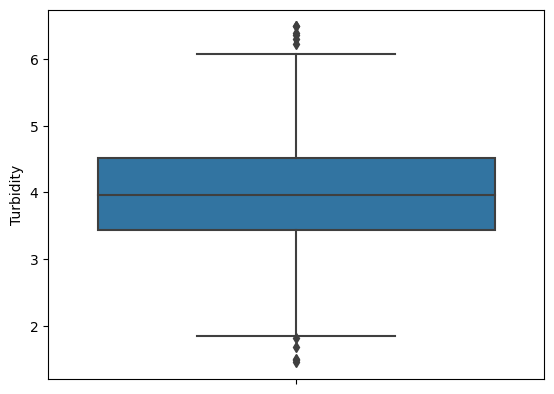

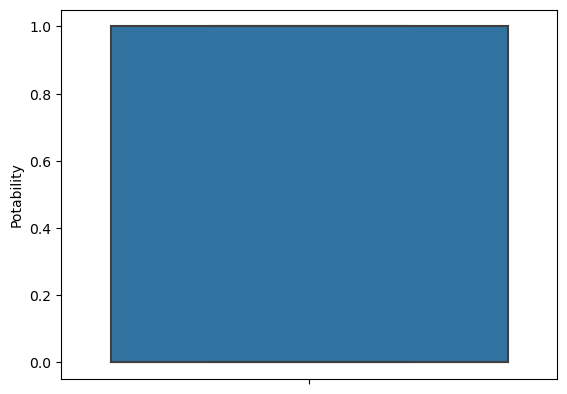

In [10]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column])
        plt.show()

#### <center> TREATING OUTLIER

In [11]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [12]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

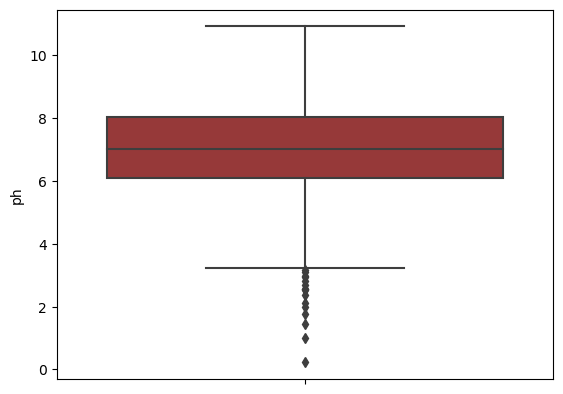

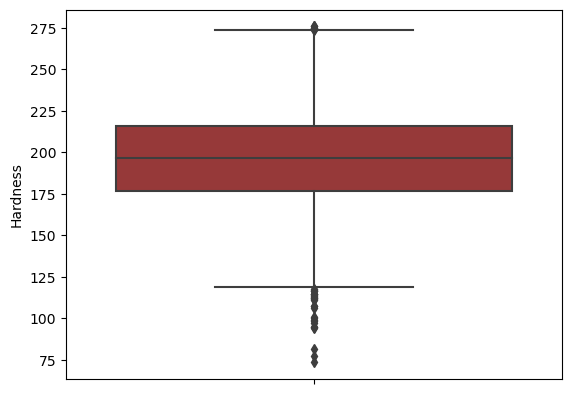

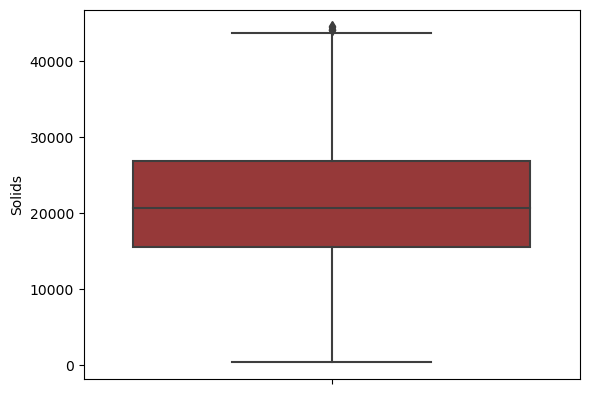

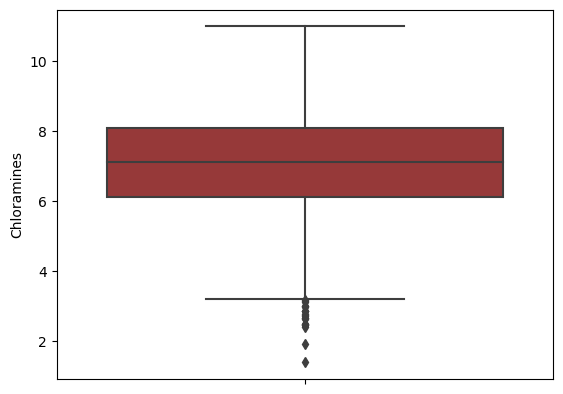

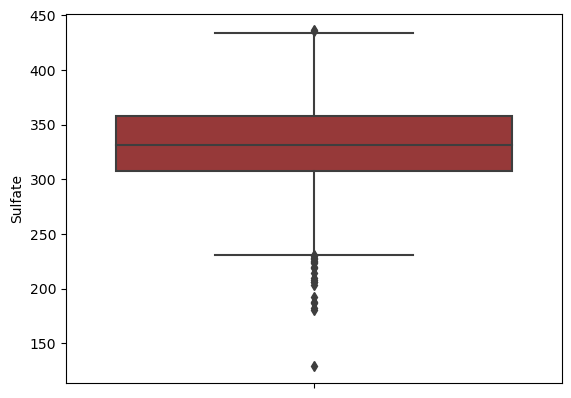

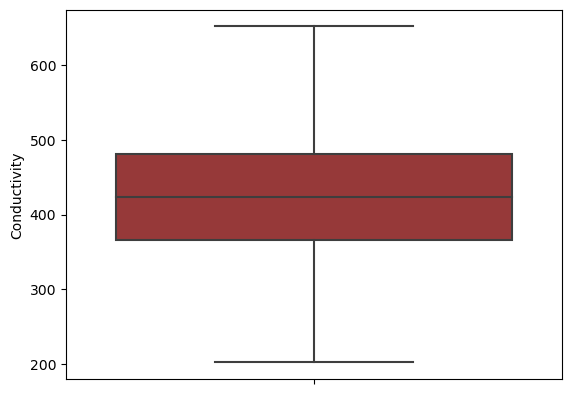

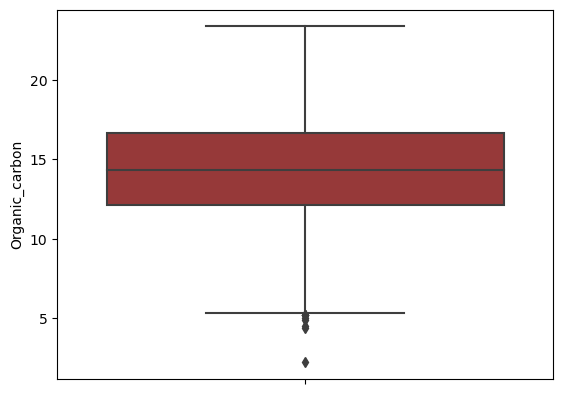

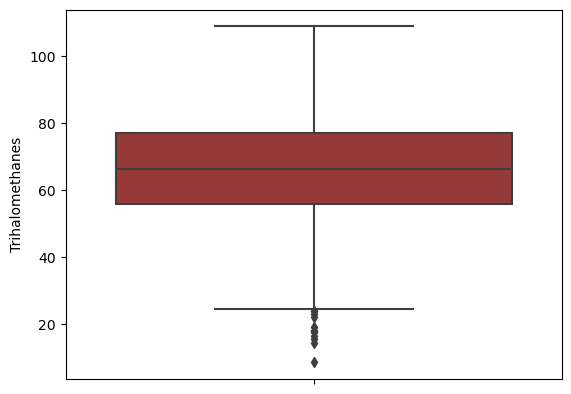

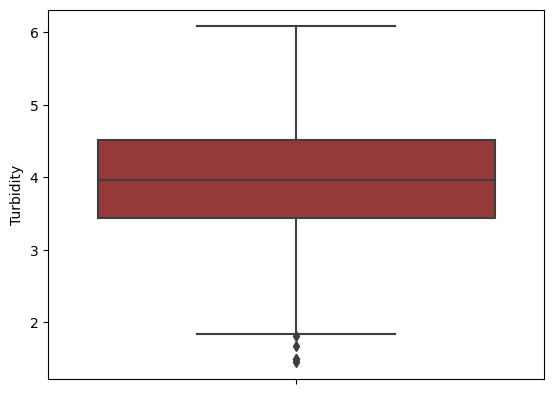

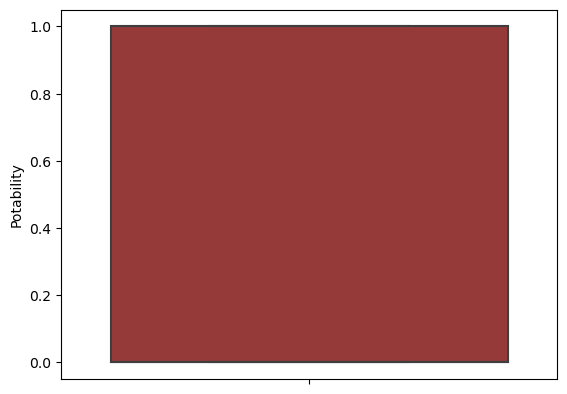

In [13]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='brown')
        plt.show()

In [14]:
df.isnull().mean()*100

ph                 0.795624
Hardness           1.093983
Solids             1.392342
Chloramines        1.044257
Sulfate            0.845351
Conductivity       0.348086
Organic_carbon     0.248633
Trihalomethanes    0.497265
Turbidity          0.298359
Potability         0.000000
dtype: float64

In [15]:
df.dropna(inplace=True)

#### <center> BIVARIATE ANALYSIS

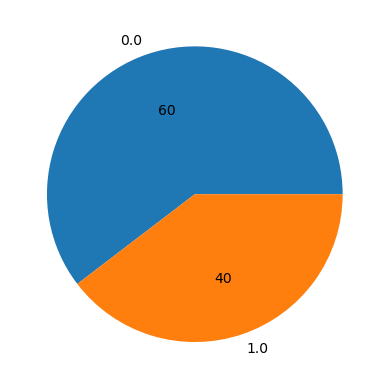

In [16]:
df.groupby('Potability').size().plot(kind = 'pie' , autopct = '%.0f')
plt.show()

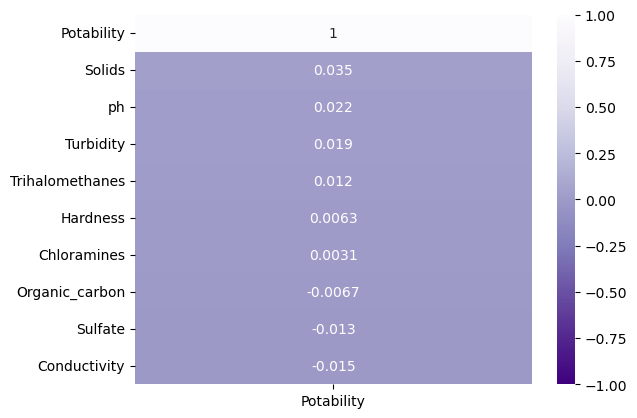

In [18]:
sns.heatmap(df.corr()[["Potability"]].sort_values(by="Potability", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Purples_r");

In [19]:
df.corr()[["Potability"]].sort_values(by="Potability", ascending=False)

,Potability
Potability,1.000000
Solids,0.034642
ph,0.022484
Turbidity,0.019364
Trihalomethanes,0.011958
Hardness,0.006338
Chloramines,0.003096
Organic_carbon,-0.006707
Sulfate,-0.012701
Conductivity,-0.015380


In [20]:
x=df[['Solids','ph','Turbidity']].values
y=df[['Potability']].values

In [21]:
sc=StandardScaler()
x= sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=45)

#### Crossvalidation

In [22]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    "SVC" : SVC(probability=True)
}

In [23]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    score_train =accuracy_score (y_train, model.predict(x_train))
    score_tst = accuracy_score(y_test, model.predict(x_test))
    con_train = confusion_matrix(y_train, model.predict(x_train))
    con_test = confusion_matrix(y_test, model.predict(x_test))
    print("Model accuracy on train is:: ",score_train)
    print("Model accuracy on test is:: ", score_tst)
    print("confusion_matrix train is:: ", con_train)
    print("confusion_matrix test is:: ", con_test)
    print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
    print("*"*60)

model trained with LogisticRegression
Model accuracy on train is::  0.6049136786188579
Model accuracy on test is::  0.5941644562334217
confusion_matrix train is::  [[910   2]
 [593   1]]
confusion_matrix test is::  [[224   1]
 [152   0]]
Wrong Predictions made: 57377 / 142129
************************************************************
model trained with DecisionTreeClassifier
Model accuracy on train is::  1.0
Model accuracy on test is::  0.5172413793103449
confusion_matrix train is::  [[912   0]
 [  0 594]]
confusion_matrix test is::  [[132  93]
 [ 89  63]]
Wrong Predictions made: 68692 / 142129
************************************************************
model trained with RandomForestClassifier
Model accuracy on train is::  1.0
Model accuracy on test is::  0.5755968169761273
confusion_matrix train is::  [[912   0]
 [  0 594]]
confusion_matrix test is::  [[181  44]
 [116  36]]
Wrong Predictions made: 63144 / 142129
************************************************************
model tr

#### ROC Curve

Model used is::  LogisticRegression()


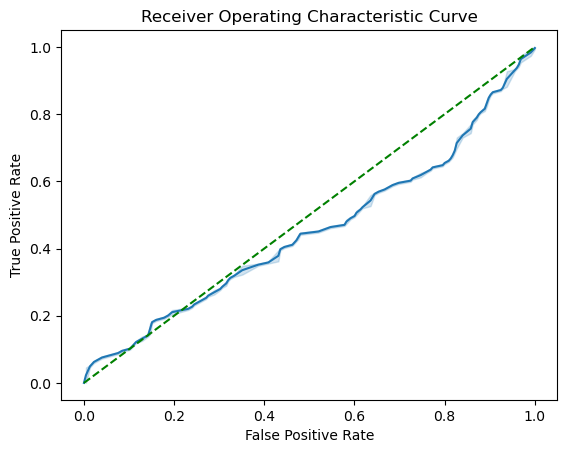

Model used is::  DecisionTreeClassifier()


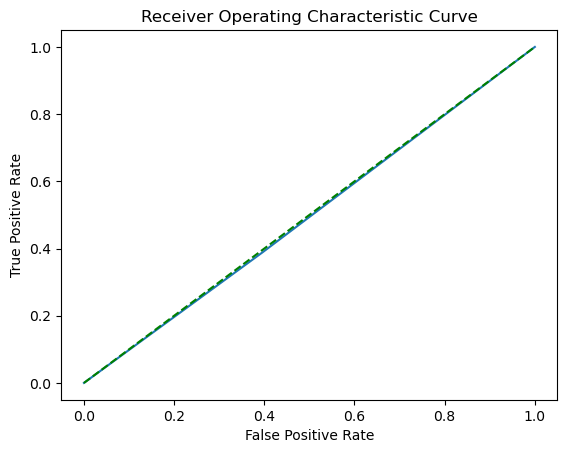

Model used is::  RandomForestClassifier()


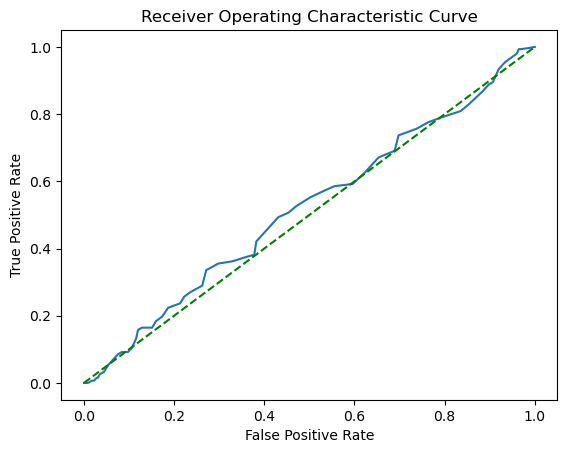

Model used is::  KNeighborsClassifier()


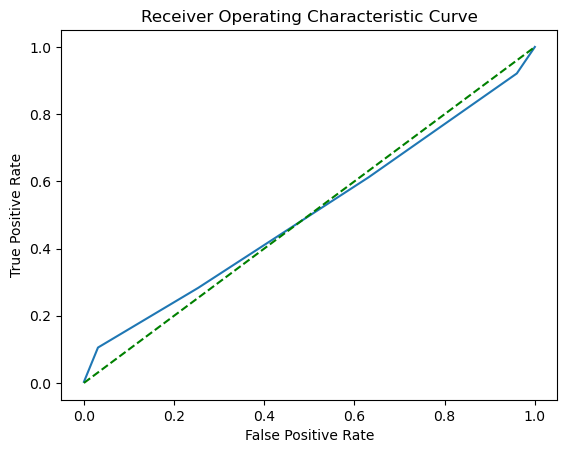

Model used is::  SVC(probability=True)


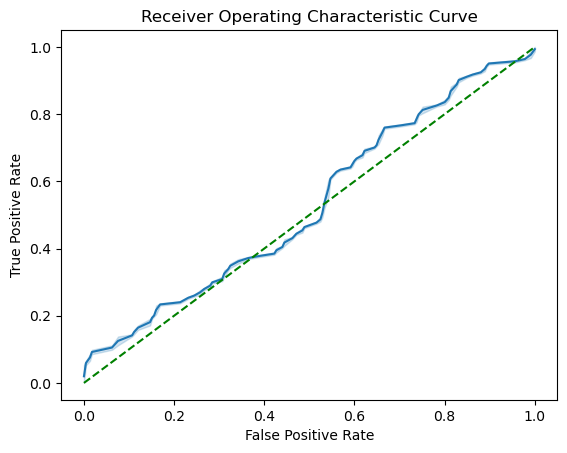

In [24]:
for name, model in models.items():
    model.fit(x_train, y_train)
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("Model used is:: ",model)
    sns.lineplot(x= fpr, y=tpr)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.show()

Model used is::  SVC(probability=True)


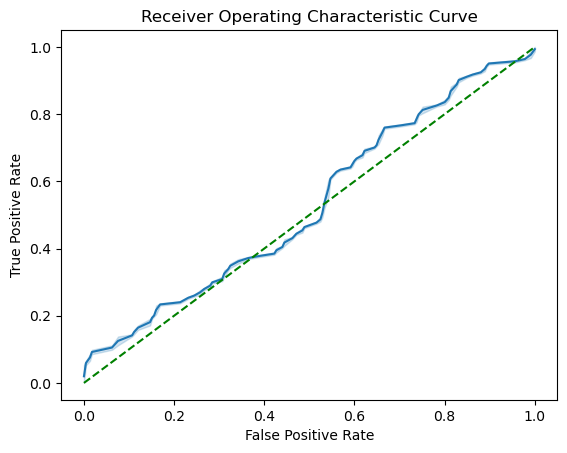

In [28]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

#### <center> conclusion